<img src = "https://github.com/barcelonagse-datascience/academic_files/raw/master/bgsedsc_0.jpg">

# Supervised Learning Project, Classification: Probability of Death 

In this project, you have to predict the probability of death of a patient that is entering an ICU (Intensive Care Unit).

# Step 01 - Import Libraries

In [134]:
# import libraries

# to manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# for feature scalling
from sklearn.preprocessing import StandardScaler

# to split data into training and testing
from sklearn.model_selection import train_test_split

# to train the dataset
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# to evaluate model
# to obtain the confusion matrix.
from sklearn.metrics import confusion_matrix


# to calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

# Step 02 - Load Data

In [93]:
# load data 
data=pd.read_csv(r"train_prob_death.csv")

# load data 
test_data=pd.read_csv(r"test_prob_death.csv")

print("Probability of Death Data")
print("=========================\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
data.head()


Probability of Death Data



,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,MeanBP_Max,MeanBP_Mean,RespRate_Min,RespRate_Max,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,GENDER,DOB,ADMITTIME,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT
0,0,55440,195768,228357,89.0,145.0,121.043478,74.0,127.0,106.586957,42.0,90.0,61.173913,59.0,94.0,74.543478,15.0,30.0,22.347826,35.111111,36.944444,36.080247,90.0,99.0,95.739130,111.0,230.0,160.777778,F,1938-11-23,2008-06-15,EMERGENCY,Medicare,PROTESTANT QUAKER,SINGLE,WHITE,GASTROINTESTINAL BLEED,5789,MICU
1,0,28424,127337,225281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,137.0,113.000000,F,1929-04-30,2008-09-12,EMERGENCY,Medicare,JEWISH,WIDOWED,WHITE,ABDOMINAL PAIN,56211,TSICU
2,0,86233,184606,237514,62.0,100.0,82.862069,62.0,154.0,114.642857,34.0,113.0,56.964286,48.0,122.0,72.750000,11.0,26.0,18.878788,36.111111,37.722222,36.907407,87.0,100.0,96.931034,116.0,183.0,142.166667,F,1935-05-15,2009-05-21,ELECTIVE,Medicare,PROTESTANT QUAKER,MARRIED,WHITE,LEFT LUNG CANCER/SDA,1625,SICU
3,0,53787,174772,244413,84.0,109.0,94.652174,81.0,163.0,121.727273,29.0,77.0,47.909091,49.0,87.0,65.727273,15.0,25.0,19.869565,35.611111,36.944444,36.203704,89.0,100.0,92.913043,233.0,484.0,361.000000,F,1937-01-14,2008-02-06,EMERGENCY,Medicare,CATHOLIC,DIVORCED,WHITE,ASTHMA;COPD EXACERBATION,49322,MICU
4,0,99384,168087,298919,74.0,98.0,81.142857,84.0,140.0,113.875000,35.0,72.0,54.343750,31.0,81.0,66.806452,17.0,28.0,23.264706,35.888889,37.111111,36.652778,88.0,99.0,94.600000,85.0,161.0,112.000000,M,1924-08-05,2010-02-24,EMERGENCY,Medicare,BUDDHIST,WIDOWED,WHITE,PULMONARY EMBOLISM,41511,TSICU


# Step 03 - Data Analysis / Understand Data

In [94]:
# understand data

# print attributes / column names of dataset
print("Attributes / Columns names in Probability of Death dataset")
print("==========================================================\n")
print(data.columns)

# total numnber of instances and columns in dataset
print("\nNumber of instances and columns in Probability of Death Data  " )
print("============================================================\n")
print(data.shape)


Attributes / Columns names in Probability of Death dataset

Index(['HOSPITAL_EXPIRE_FLAG', 'subject_id', 'hadm_id', 'icustay_id',
       'HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min',
       'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean',
       'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min',
       'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean',
       'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max',
       'Glucose_Mean', 'GENDER', 'DOB', 'ADMITTIME', 'ADMISSION_TYPE',
       'INSURANCE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS',
       'ICD9_diagnosis', 'FIRST_CAREUNIT'],
      dtype='object')

Number of instances and columns in Probability of Death Data  

(13840, 39)


### Categorical Features

In [95]:
# find all categorical features from Probability of Death dataset
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O' and feature not in ['DOB','ADMITTIME']]

print('Number of categorical features: ', len(categorical_features))
print("===================================")

# display the categorical features
data[categorical_features].head()

Number of categorical features:  9


,GENDER,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT
0,F,EMERGENCY,Medicare,PROTESTANT QUAKER,SINGLE,WHITE,GASTROINTESTINAL BLEED,5789,MICU
1,F,EMERGENCY,Medicare,JEWISH,WIDOWED,WHITE,ABDOMINAL PAIN,56211,TSICU
2,F,ELECTIVE,Medicare,PROTESTANT QUAKER,MARRIED,WHITE,LEFT LUNG CANCER/SDA,1625,SICU
3,F,EMERGENCY,Medicare,CATHOLIC,DIVORCED,WHITE,ASTHMA;COPD EXACERBATION,49322,MICU
4,M,EMERGENCY,Medicare,BUDDHIST,WIDOWED,WHITE,PULMONARY EMBOLISM,41511,TSICU


In [96]:
# check number of unique values in all categorical features

for feature in categorical_features:
    print(f'{feature} : Unique Values(Categories) {len(data[feature].unique())}')

GENDER : Unique Values(Categories) 2
ADMISSION_TYPE : Unique Values(Categories) 3
INSURANCE : Unique Values(Categories) 5
RELIGION : Unique Values(Categories) 16
MARITAL_STATUS : Unique Values(Categories) 8
ETHNICITY : Unique Values(Categories) 41
DIAGNOSIS : Unique Values(Categories) 4418
ICD9_diagnosis : Unique Values(Categories) 1552
FIRST_CAREUNIT : Unique Values(Categories) 5


### Relationship between Categorical Features and Probability of Death

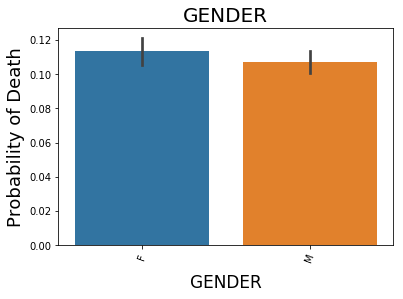

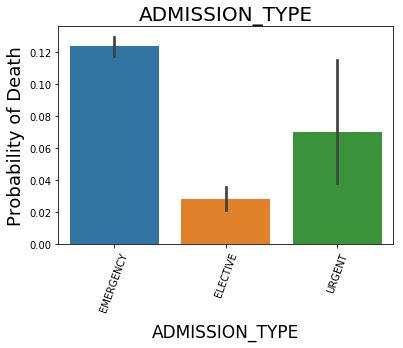

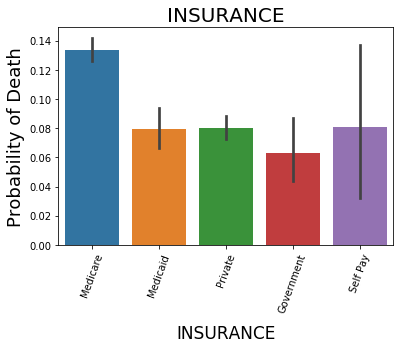

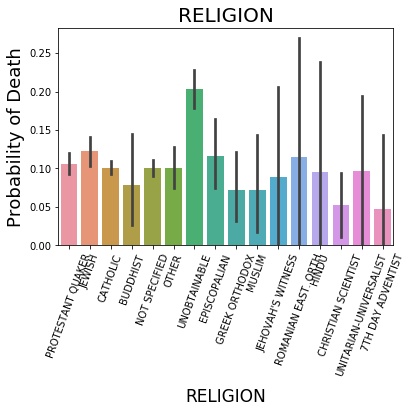

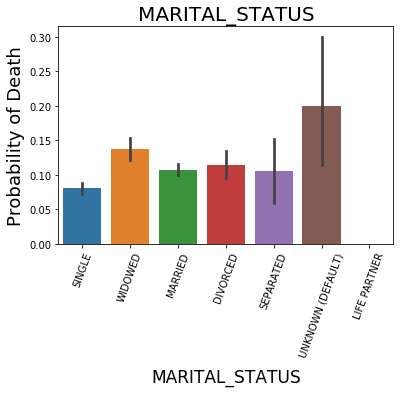

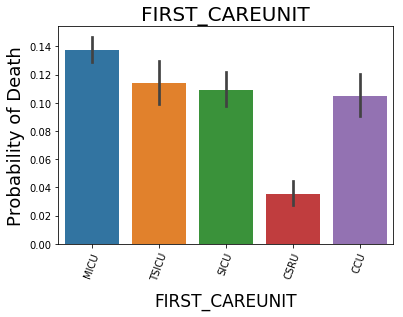

In [97]:
# relationship between categorical features and dependant feature (Hospital_Expiry_Flag) using bar chart
for feature in categorical_features:
    if feature in ['GENDER','ADMISSION_TYPE','INSURANCE','RELIGION','MARITAL_STATUS','FIRST_CAREUNIT']:
        r=sns.barplot(x=feature,y='HOSPITAL_EXPIRE_FLAG',data=data)
        r.axes.set_title(feature,fontsize=20)
        r.set_xlabel(feature,fontsize=17,labelpad=10)
        r.set_ylabel('Probability of Death',fontsize=18)
        degrees = 70
        plt.xticks(rotation=degrees)
        plt.show()



### Numerical Features

In [98]:
# find all numerical features from Probability of Death dataset
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical features: ', len(numerical_features))
print("==================================")

# display the numerical features
data[numerical_features].head()

Number of numerical features:  28


,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,MeanBP_Max,MeanBP_Mean,RespRate_Min,RespRate_Max,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean
0,0,55440,195768,228357,89.0,145.0,121.043478,74.0,127.0,106.586957,42.0,90.0,61.173913,59.0,94.0,74.543478,15.0,30.0,22.347826,35.111111,36.944444,36.080247,90.0,99.0,95.739130,111.0,230.0,160.777778
1,0,28424,127337,225281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,137.0,113.000000
2,0,86233,184606,237514,62.0,100.0,82.862069,62.0,154.0,114.642857,34.0,113.0,56.964286,48.0,122.0,72.750000,11.0,26.0,18.878788,36.111111,37.722222,36.907407,87.0,100.0,96.931034,116.0,183.0,142.166667
3,0,53787,174772,244413,84.0,109.0,94.652174,81.0,163.0,121.727273,29.0,77.0,47.909091,49.0,87.0,65.727273,15.0,25.0,19.869565,35.611111,36.944444,36.203704,89.0,100.0,92.913043,233.0,484.0,361.000000
4,0,99384,168087,298919,74.0,98.0,81.142857,84.0,140.0,113.875000,35.0,72.0,54.343750,31.0,81.0,66.806452,17.0,28.0,23.264706,35.888889,37.111111,36.652778,88.0,99.0,94.600000,85.0,161.0,112.000000


Numeric features are of two types
1. Discrete 
2. Continous

### Discrete Features

In [99]:
# find all discrete features
# subject_id, hadm_id, icustay_id are not required
discrete_features=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in ['subject_id','hadm_id','icustay_id','HOSPITAL_EXPIRE_FLAG']]
print("Number of discrete features:",len(discrete_features))
print("==============================")
data[discrete_features].head()

Number of discrete features: 1


,SpO2_Max
0,99.0
1,NaN
2,100.0
3,100.0
4,99.0


### Relationship between Discrete Feature and Probability of Death

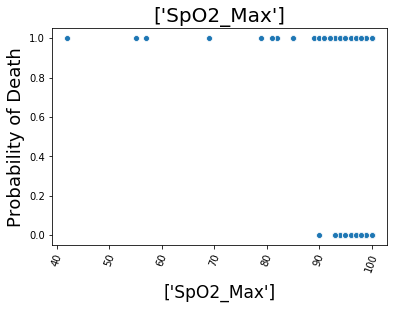

In [100]:
# relationship between discrete features and dependant feature (Probaility of Death)
r=sns.scatterplot(x='SpO2_Max',y='HOSPITAL_EXPIRE_FLAG',data=data)
r.axes.set_title(discrete_features,fontsize=20)
r.set_xlabel(discrete_features,fontsize=17,labelpad=10)
r.set_ylabel('Probability of Death',fontsize=18)
degrees = 70
plt.xticks(rotation=degrees)
plt.show()

### Continous Features

In [101]:
# find all discrete features
# subject_id, hadm_id, icustay_id are not required

continous_features=[feature for feature in numerical_features if feature not in discrete_features+['subject_id','hadm_id','icustay_id','HOSPITAL_EXPIRE_FLAG']]
print("Number of continous features:",len(continous_features))
print("================================")
data[continous_features].head()

Number of continous features: 23


,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,MeanBP_Max,MeanBP_Mean,RespRate_Min,RespRate_Max,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean
0,89.0,145.0,121.043478,74.0,127.0,106.586957,42.0,90.0,61.173913,59.0,94.0,74.543478,15.0,30.0,22.347826,35.111111,36.944444,36.080247,90.0,95.739130,111.0,230.0,160.777778
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,137.0,113.000000
2,62.0,100.0,82.862069,62.0,154.0,114.642857,34.0,113.0,56.964286,48.0,122.0,72.750000,11.0,26.0,18.878788,36.111111,37.722222,36.907407,87.0,96.931034,116.0,183.0,142.166667
3,84.0,109.0,94.652174,81.0,163.0,121.727273,29.0,77.0,47.909091,49.0,87.0,65.727273,15.0,25.0,19.869565,35.611111,36.944444,36.203704,89.0,92.913043,233.0,484.0,361.000000
4,74.0,98.0,81.142857,84.0,140.0,113.875000,35.0,72.0,54.343750,31.0,81.0,66.806452,17.0,28.0,23.264706,35.888889,37.111111,36.652778,88.0,94.600000,85.0,161.0,112.000000


### Relationship between Continous Features and Probability of Death

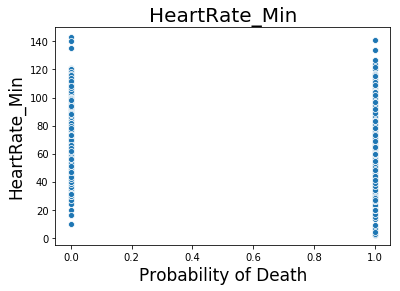

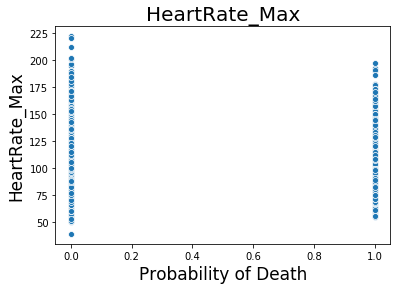

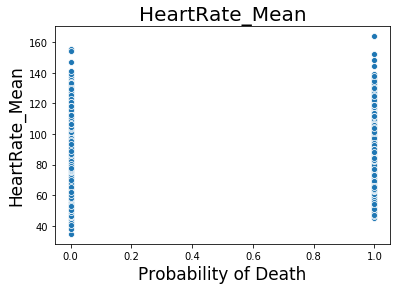

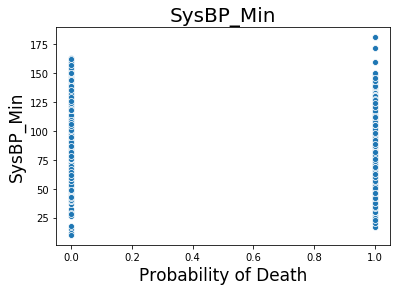

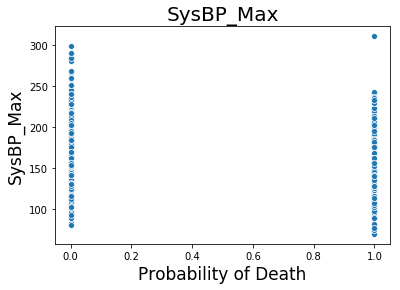

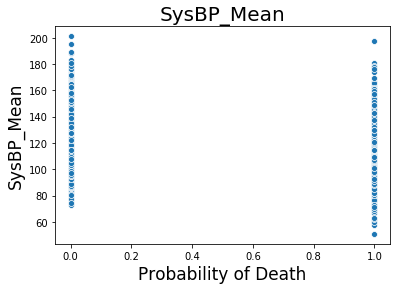

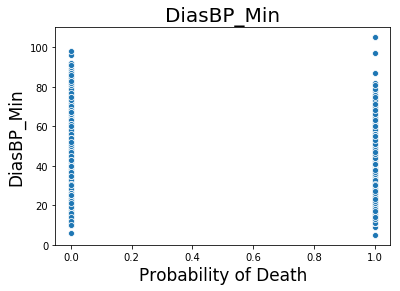

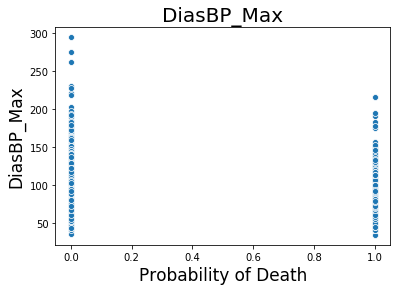

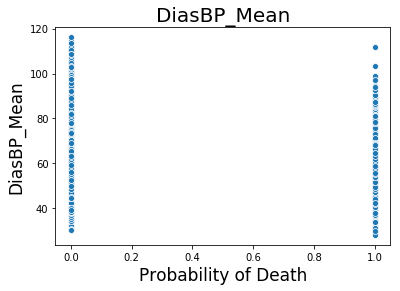

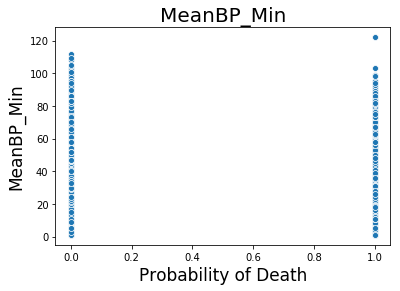

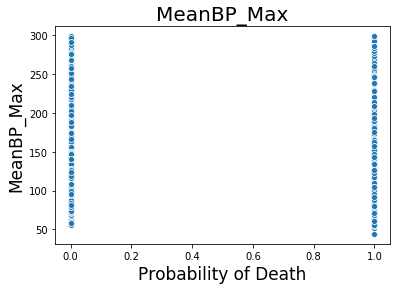

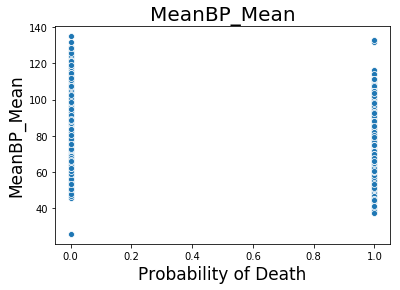

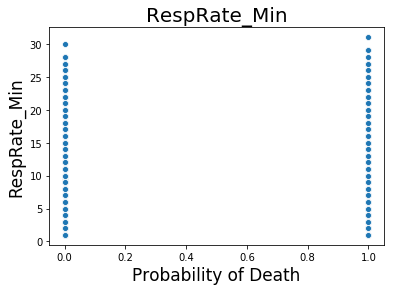

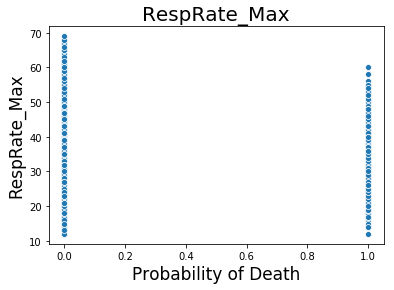

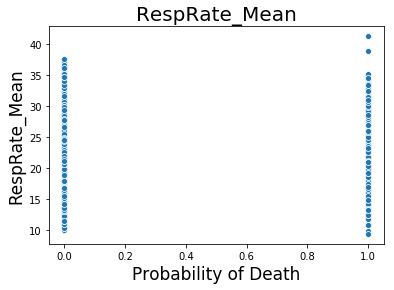

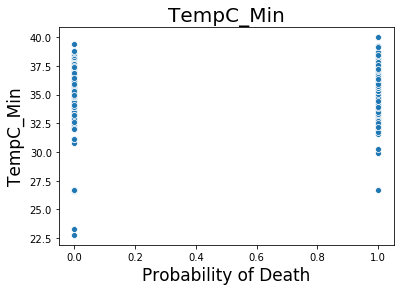

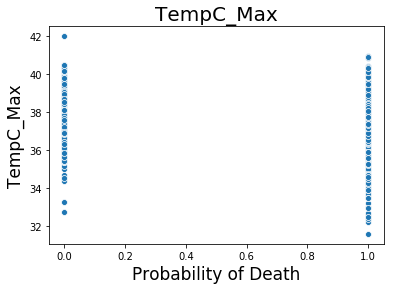

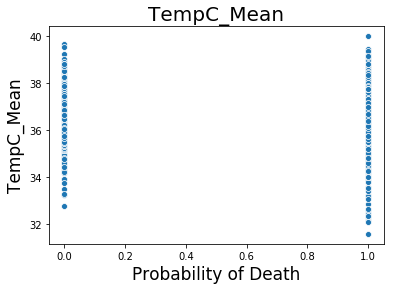

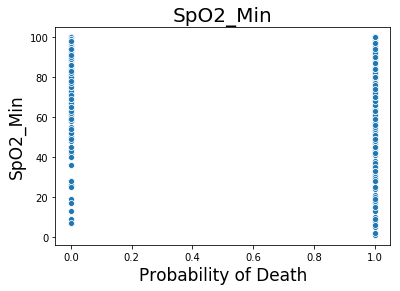

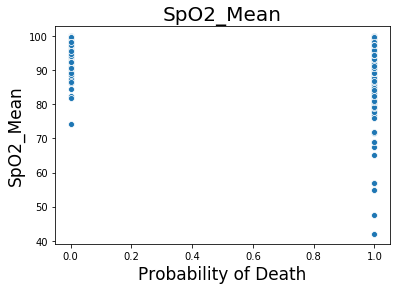

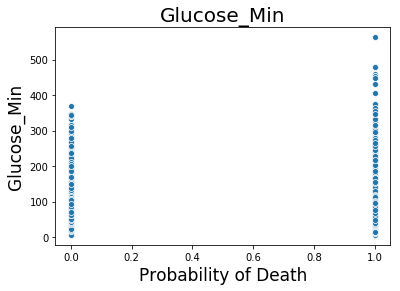

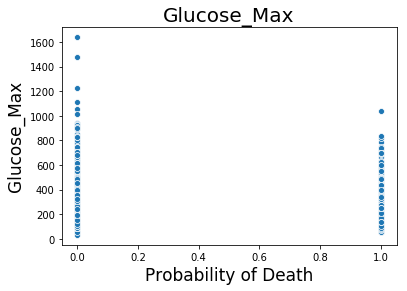

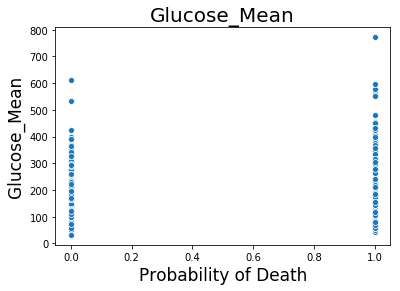

In [102]:
# relationship between continous features and dependant feature (Probability of Death) using scatter chart
for feature in continous_features:
    r=sns.scatterplot(x='HOSPITAL_EXPIRE_FLAG',y=feature,data=data)
    r.axes.set_title(feature,fontsize=20)
    r.set_xlabel('Probability of Death',fontsize=17)
    r.set_ylabel(feature,fontsize=17)
    plt.show()

### Missing Values

In [103]:
# checking for any null values
print("\nChecking for null values and data types")
print("=======================================")
print(data.info())


Checking for null values and data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 39 columns):
HOSPITAL_EXPIRE_FLAG    13840 non-null int64
subject_id              13840 non-null int64
hadm_id                 13840 non-null int64
icustay_id              13840 non-null int64
HeartRate_Min           11177 non-null float64
HeartRate_Max           11177 non-null float64
HeartRate_Mean          11177 non-null float64
SysBP_Min               11164 non-null float64
SysBP_Max               11164 non-null float64
SysBP_Mean              11164 non-null float64
DiasBP_Min              11164 non-null float64
DiasBP_Max              11164 non-null float64
DiasBP_Mean             11164 non-null float64
MeanBP_Min              11177 non-null float64
MeanBP_Max              11177 non-null float64
MeanBP_Mean             11177 non-null float64
RespRate_Min            11175 non-null float64
RespRate_Max            11175 non-null float64
RespRate_Mea

In [104]:
# list of features which has missing values
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]
print("Features with missing values")
print("============================")
print(features_with_na)

Features with missing values
['HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max', 'Glucose_Mean', 'MARITAL_STATUS']


# Step 04 - Pre-process Data / Data Preparation

In [105]:
# Dropping IDs - not useful as predictors 
data=data.drop(['subject_id', "hadm_id", "icustay_id"], axis = 1)

# Dropping IDs from test data - not useful as predictors 
test_data=test_data.drop(['subject_id', "hadm_id", "icustay_id"], axis = 1)

In [106]:
# create new feature Age by subtracting DOB - AdmissionTimeDate
# converting date to datetime object
data['ADMITTIME'] = pd.to_datetime(data['ADMITTIME'])
data['ADMITTIME'] = pd.DatetimeIndex(data['ADMITTIME']).year
data['DOB'] = pd.to_datetime(data['DOB'])
data['DOB'] = pd.DatetimeIndex(data['DOB']).year
data['AGE']=data['ADMITTIME']-data['DOB']

# create new feature Age for test data by subtracting DOB - AdmissionTimeDate 
# converting date to datetime object
test_data['ADMITTIME'] = pd.to_datetime(test_data['ADMITTIME'])
test_data['ADMITTIME'] = pd.DatetimeIndex(test_data['ADMITTIME']).year
test_data['DOB'] = pd.to_datetime(test_data['DOB'])
test_data['DOB'] = pd.DatetimeIndex(test_data['DOB']).year
test_data['AGE']=test_data['ADMITTIME']-test_data['DOB']

In [107]:
# now drop DOB, ADMITTIME
data=data.drop(['DOB','ADMITTIME'],axis=1)

# now drop DOB, ADMITTIME from test data
test_data=test_data.drop(['DOB','ADMITTIME'],axis=1)

### Handle Missing Values of Numerical Features

In [108]:
# Now lets check for numerical variables that contains missing values
numerical_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes!='O']

print(numerical_with_nan)

['HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max', 'Glucose_Mean']


In [109]:
# Replacing the numerical Missing Values

for feature in numerical_with_nan:
    # We will replace by using median 
    median_value=data[feature].median()
    data[feature].fillna(median_value,inplace=True)
    
# Replacing the numerical Missing Values from test data

for feature in numerical_with_nan:
    # We will replace by using median 
    median_value_t=test_data[feature].median()
    test_data[feature].fillna(median_value_t,inplace=True)    
    
# Again check for missing values
print("Check missing values of numerical features if exist")
print("===================================================")
data[numerical_with_nan].isnull().sum()

Check missing values of numerical features if exist


HeartRate_Min     0
HeartRate_Max     0
HeartRate_Mean    0
SysBP_Min         0
SysBP_Max         0
SysBP_Mean        0
DiasBP_Min        0
DiasBP_Max        0
DiasBP_Mean       0
MeanBP_Min        0
MeanBP_Max        0
MeanBP_Mean       0
RespRate_Min      0
RespRate_Max      0
RespRate_Mean     0
TempC_Min         0
TempC_Max         0
TempC_Mean        0
SpO2_Min          0
SpO2_Max          0
SpO2_Mean         0
Glucose_Min       0
Glucose_Max       0
Glucose_Mean      0
dtype: int64

### Handle Missing values of Categorical Features

In [110]:
# Now lets check for categorical featurtes that contains missing values
categorical_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes=='O']

print(categorical_with_nan)

['MARITAL_STATUS']


In [111]:
# replace Nan value with mode value
# because there is no much missing values

mode_value=data['MARITAL_STATUS'].mode()[0]
data["MARITAL_STATUS"].fillna(mode_value,inplace=True)

# do same for test data
mode_value_t=test_data['MARITAL_STATUS'].mode()[0]
test_data["MARITAL_STATUS"].fillna(mode_value_t,inplace=True)

# Again check for missing values
print("Check missing values of categorical features if exist")
print("=====================================================")
data[categorical_with_nan].isnull().sum()

Check missing values of categorical features if exist


MARITAL_STATUS    0
dtype: int64

###  Dummy Variables (One Hot Encoding)

In [112]:
# Converting categorical data into dummies
# we will create dummy cariables for those categorical features which has less number of categories
Adm_Type = pd.get_dummies(data['ADMISSION_TYPE'],drop_first=True)
data = data.drop('ADMISSION_TYPE', axis=1)
data= data.join(Adm_Type)

Ethn = pd.get_dummies(data['ETHNICITY'])
data= data.drop('ETHNICITY', axis=1)
Ethn = Ethn["WHITE"]
data = data.join(Ethn)

Ins = pd.get_dummies(data['INSURANCE'],drop_first=True)
data = data.drop('INSURANCE', axis=1)
data = data.join(Ins)

Unit = pd.get_dummies(data['FIRST_CAREUNIT'],drop_first=True)
data = data.drop('FIRST_CAREUNIT', axis=1)
data = data.join(Unit)

Gender = pd.get_dummies(data['GENDER'],drop_first=True)
data = data.drop('GENDER', axis=1)
data = data.join(Gender)

# do same for test data
Adm_Type = pd.get_dummies(test_data['ADMISSION_TYPE'],drop_first=True)
test_data = test_data.drop('ADMISSION_TYPE', axis=1)
test_data= test_data.join(Adm_Type)

Ethn = pd.get_dummies(test_data['ETHNICITY'])
test_data= test_data.drop('ETHNICITY', axis=1)
Ethn = Ethn["WHITE"]
test_data = test_data.join(Ethn)

Ins = pd.get_dummies(test_data['INSURANCE'],drop_first=True)
test_data = test_data.drop('INSURANCE', axis=1)
test_data = test_data.join(Ins)

Unit = pd.get_dummies(test_data['FIRST_CAREUNIT'],drop_first=True)
test_data = test_data.drop('FIRST_CAREUNIT', axis=1)
test_data = test_data.join(Unit)

Gender = pd.get_dummies(test_data['GENDER'],drop_first=True)
test_data = test_data.drop('GENDER', axis=1)
test_data = test_data.join(Gender)

In [113]:
print(data.shape)
test_data.shape

(13840, 42)


(12065, 41)

### Count / Frequency Encoding

In [114]:
# we will do frequency encoding for those categorical features which has greater number of categories

religion_frequency_map = data.RELIGION.value_counts().to_dict()
# replace RELIGION labels in the dataset with their counts
data.RELIGION = data.RELIGION.map(religion_frequency_map)

ms_frequency_map = data.MARITAL_STATUS.value_counts().to_dict()
# replace MERITAL_STATUS labels in the dataset with their counts
data.MARITAL_STATUS = data.MARITAL_STATUS.map(ms_frequency_map)

diagnosis_frequency_map = data.DIAGNOSIS.value_counts().to_dict()
# replace DIAGNOSIS labels in the dataset with their counts
data.DIAGNOSIS = data.DIAGNOSIS.map(diagnosis_frequency_map)

icd_frequency_map = data.ICD9_diagnosis.value_counts().to_dict()
# replace ICD9_diagnosis labels in the dataset with their counts
data.ICD9_diagnosis = data.ICD9_diagnosis.map(icd_frequency_map)


# do same for test data
religion_frequency_map = test_data.RELIGION.value_counts().to_dict()
# replace RELIGION labels in the dataset with their counts
test_data.RELIGION = test_data.RELIGION.map(religion_frequency_map)

ms_frequency_map = test_data.MARITAL_STATUS.value_counts().to_dict()
# replace MERITAL_STATUS labels in the dataset with their counts
test_data.MARITAL_STATUS = test_data.MARITAL_STATUS.map(ms_frequency_map)

diagnosis_frequency_map = test_data.DIAGNOSIS.value_counts().to_dict()
# replace DIAGNOSIS labels in the dataset with their counts
test_data.DIAGNOSIS = test_data.DIAGNOSIS.map(diagnosis_frequency_map)

icd_frequency_map = test_data.ICD9_diagnosis.value_counts().to_dict()
# replace ICD9_diagnosis labels in the dataset with their counts
test_data.ICD9_diagnosis = test_data.ICD9_diagnosis.map(icd_frequency_map)

### Splitting Input and Output Features

In [115]:
# for feature scalling first we will split input and output features
input_features = data.drop("HOSPITAL_EXPIRE_FLAG",axis=1)
output_feature = data["HOSPITAL_EXPIRE_FLAG"]
output_features=pd.DataFrame(output_feature)


### Feature Scalling

In [116]:
# use standard scalar for scalling
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(input_features)

# for test data
# transform data
scaled_test_data = scaler.fit_transform(test_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [117]:
input_features_scaled=pd.DataFrame(scaled,columns=['HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min',
       'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean',
       'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min',
       'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean',
       'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max',
       'Glucose_Mean', 'RELIGION', 'MARITAL_STATUS', 'DIAGNOSIS',
       'ICD9_diagnosis', 'AGE', 'EMERGENCY', 'URGENT', 'WHITE',
       'Medicaid', 'Medicare', 'Private', 'Self Pay', 'CSRU', 'MICU', 'SICU',
       'TSICU', 'M'])

test_data_scaled=pd.DataFrame(scaled_test_data,columns=['HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min',
       'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean',
       'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min',
       'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean',
       'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max',
       'Glucose_Mean', 'RELIGION', 'MARITAL_STATUS', 'DIAGNOSIS',
       'ICD9_diagnosis', 'AGE', 'EMERGENCY', 'URGENT', 'WHITE',
       'Medicaid', 'Medicare', 'Private', 'Self Pay', 'CSRU', 'MICU', 'SICU',
       'TSICU', 'M'])
input_features_scaled.head()

,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,MeanBP_Max,MeanBP_Mean,RespRate_Min,RespRate_Max,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,RELIGION,MARITAL_STATUS,DIAGNOSIS,ICD9_diagnosis,AGE,EMERGENCY,URGENT,WHITE,Medicaid,Medicare,Private,Self Pay,CSRU,MICU,SICU,TSICU,M
0,1.451602,2.156100,2.622065,-1.087840,-1.074548,-0.801632,-0.224292,0.116544,-0.128354,0.182940,-0.480153,-0.289443,0.946030,0.429244,1.011424,-1.439083,-0.652586,-1.240716,-0.171146,-0.508193,-0.526755,0.092819,0.561058,0.490850,-0.798325,-0.419533,0.208259,-0.055849,0.328577,0.419727,-0.107117,0.615101,-0.331323,0.878039,-0.650939,-0.095082,-0.423768,1.186858,-0.481068,-0.380333,-1.135059
1,-0.045346,-0.091374,-0.061459,-0.025617,-0.101291,-0.124882,-0.037926,-0.110307,-0.088347,0.029227,-0.164073,-0.110053,0.017785,-0.099919,-0.145314,0.081467,-0.109396,-0.022905,0.123372,0.303508,0.107062,-0.297313,-0.474360,-0.562711,-1.155503,-1.317984,0.908679,-0.520181,0.846799,0.419727,-0.107117,0.615101,-0.331323,0.878039,-0.650939,-0.095082,-0.423768,-0.842561,-0.481068,2.629276,-1.135059
2,-0.569278,-0.251908,-0.152707,-1.837644,0.176783,-0.273414,-0.969753,1.420935,-0.548670,-0.662484,0.626129,-0.466203,-0.291631,-0.276307,0.011854,0.081467,0.433794,0.298780,-0.612923,0.303508,0.018353,0.232152,0.037782,0.080451,-0.798325,0.923371,-0.652674,-0.548609,0.558898,-2.382502,-0.107117,0.615101,-0.331323,0.878039,-0.650939,-0.095082,-0.423768,-0.842561,2.078709,-0.380333,-1.135059
3,1.077365,0.229693,0.704120,-0.650454,0.593893,0.191104,-1.435667,-0.620721,-1.452797,-0.585627,-0.756724,-1.158344,0.946030,-0.452695,0.297337,-0.678808,-0.652586,-1.010941,-0.318405,0.303508,-1.819245,3.492542,3.388974,4.906006,1.068824,-1.756075,0.084226,-0.515442,0.386157,0.419727,-0.107117,0.615101,-0.331323,0.878039,-0.650939,-0.095082,-0.423768,1.186858,-0.481068,-0.380333,-1.135059
4,0.328891,-0.358931,-0.277647,-0.463002,-0.472055,-0.323762,-0.876570,-0.904284,-0.810321,-1.969048,-0.993785,-1.051983,1.564861,0.076469,1.275614,-0.256433,-0.419790,-0.175132,-0.465664,-0.508193,-1.047728,-0.631712,-0.207155,-0.584763,-1.829524,-1.317984,-0.477569,-0.633894,1.249860,0.419727,-0.107117,0.615101,-0.331323,0.878039,-0.650939,-0.095082,-0.423768,-0.842561,-0.481068,2.629276,0.881011


# Step 05 - Train-test Split

In [118]:
# Splitting Sample Data into Training Data and Testing Data
input_features_train, input_features_test, output_feature_train, output_feature_test = train_test_split(input_features_scaled, output_features, random_state=34, test_size=0.33)

# Step 06 - Train the Algorithms using Training Data

In [119]:
# Train the Random Forest Classifier
print("\n\nTraining the Random Forest Classifier on Training Data")
print("======================================================\n")
rfc_model = RandomForestClassifier(n_estimators=20,random_state=0)
rfc_model.fit(input_features_train,np.ravel(output_feature_train))
print(rfc_model)

# Train the Logistic Regression
print("\n\nTraining the Logistic Regression on Training Data")
print("=================================================\n")
lr_model = LogisticRegression(penalty='l2', C=100.0, 
                              fit_intercept=True, 
                              intercept_scaling=1, 
                              solver='liblinear', max_iter=500)
lr_model.fit(input_features_train,np.ravel(output_feature_train))
print(lr_model)




Training the Random Forest Classifier on Training Data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


Training the Logistic Regression on Training Data

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


In [120]:
model_predictions_rfc=rfc_model.predict(input_features_test)
model_predictions_lr=lr_model.predict(input_features_test)

# Step 07 - Evaluate the Models

In [146]:
# Calculate the Accuracy Score

model_accuracy_score_rfc = accuracy_score(output_feature_test,model_predictions_rfc)

print("\n\nAccuracy Score of Random Forest Classifier:")
print("===========================================")
print(round(model_accuracy_score_rfc,2))

# Calculate the Accuracy Score

model_accuracy_score_lr = accuracy_score(output_feature_test,model_predictions_lr)

print("\n\nAccuracy Score of Logistic Regression:")
print("======================================")
print(round(model_accuracy_score_lr,2))




Accuracy Score of Random Forest Classifier:
0.9


Accuracy Score of Logistic Regression:
0.9


Confusion Matrix
[[4037   13]
 [ 454   64]]


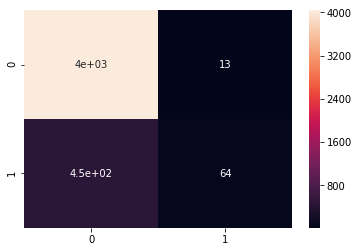

In [140]:
# build confusion matrix
cm=confusion_matrix(output_feature_test,model_predictions_svc)
print("Confusion Matrix")
print("================")
print(cm)
# visualize confusion matrix 
class_labels = ['Survuved', 'Dead']
sns.heatmap(cm, annot=True)


# Step 08 - Predictions for Test Data


In [143]:
# make predictions for test data 
predictions=lr_model.predict_proba(test_data_scaled)
HOSPITAL_EXPIRE_FLAG=pd.DataFrame(predictions,columns=['HOSPITAL_EXPIRE_FLAG_0','HOSPITAL_EXPIRE_FLAG_1'])

df2=pd.read_csv(r"test_prob_death.csv")
icustay_id_series=df2["icustay_id"]
icustay_id=pd.DataFrame(icustay_id_series)

sample_sol_prob_death=icustay_id.join(HOSPITAL_EXPIRE_FLAG['HOSPITAL_EXPIRE_FLAG_1'])
sample_sol_prob_death.head()

,icustay_id,HOSPITAL_EXPIRE_FLAG_1
0,221004,0.042668
1,296315,0.068384
2,245557,0.100999
3,287519,0.049754
4,231164,0.118027


# Step 09 - Save Predictions in CSV File

In [87]:
sample_sol_prob_death.to_csv(r'test_data_predictions_prob_death.csv', index = False, header = True)